### Boston House Prediction — Assignment Notebook

- **Author**: Mridul M Kumar
- **Course**:-LAB
- **Date**:- 04-09-2025

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('boston_housing.csv')

### Dataset overview


In [13]:
print("Rows, Columns:", df.shape)
df.head()


Rows, Columns: (506, 16)


,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [14]:
df.head()

,TOWN,TRACT,LON,LAT,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,Nahant,2011,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3
1,Swampscott,2021,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8
2,Swampscott,2022,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8
3,Marblehead,2031,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7
4,Marblehead,2032,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7


In [15]:
df.columns

Index(['TOWN', 'TRACT', 'LON', 'LAT', 'MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS',
       'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TRACT    506 non-null    int64  
 2   LON      506 non-null    float64
 3   LAT      506 non-null    float64
 4   MEDV     506 non-null    float64
 5   CRIM     506 non-null    float64
 6   ZN       506 non-null    float64
 7   INDUS    506 non-null    float64
 8   CHAS     506 non-null    int64  
 9   NOX      506 non-null    float64
 10  RM       506 non-null    float64
 11  AGE      506 non-null    float64
 12  DIS      506 non-null    float64
 13  RAD      506 non-null    int64  
 14  TAX      506 non-null    int64  
 15  PTRATIO  506 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 63.4+ KB


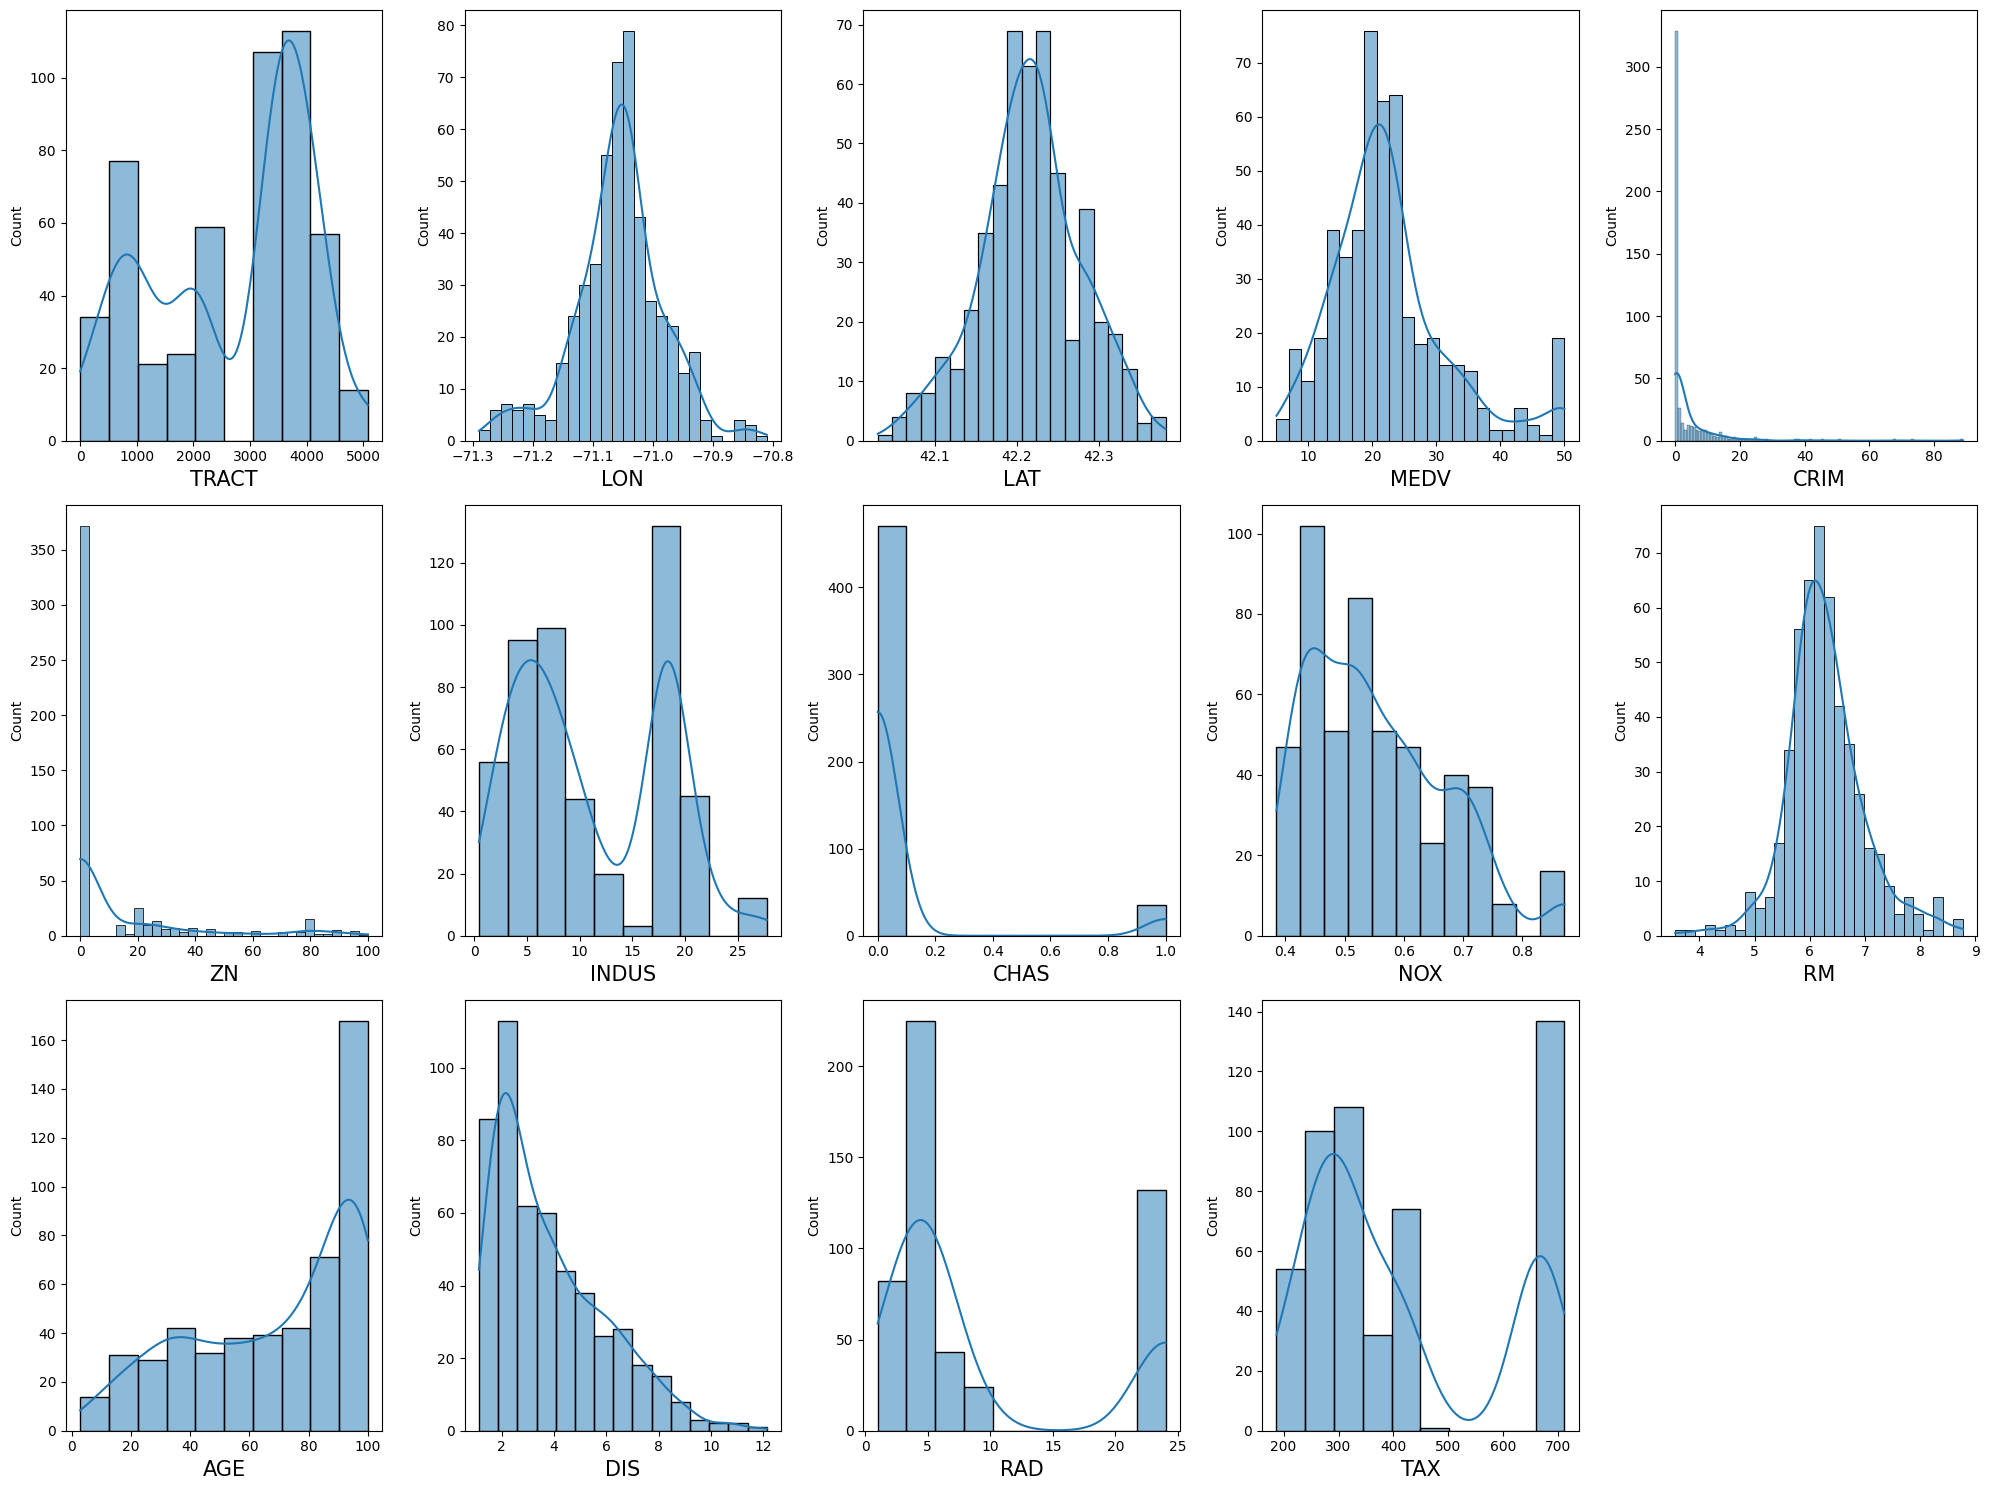

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in numeric_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column], kde=True, ax=ax)
        plt.xlabel(column, fontsize=15)
        plotnumber += 1
    else:
        break

plt.tight_layout()
plt.show()

### Missing values


In [18]:
df.isnull().sum()


TOWN       0
TRACT      0
LON        0
LAT        0
MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
dtype: int64

### Features and target


In [19]:
x = df.select_dtypes(include=['number']).drop(columns=['MEDV'], errors='ignore')
y = df['MEDV']
print("X columns:", list(x.columns))
print("Target:", 'MEDV')


X columns: ['TRACT', 'LON', 'LAT', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
Target: MEDV


### Strongest correlations with MEDV


In [20]:
corr = df_clean.select_dtypes(include=['number']).corr(numeric_only=True)['MEDV'].drop('MEDV').sort_values(ascending=False)
print("Top + correlations:\n", corr.head(5))
print("\nTop - correlations:\n", corr.tail(5))


NameError: name 'df_clean' is not defined

### Train/test split (80/20)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape : {x_test.shape}")
print(f"y shape      : {y.shape}")


x_train shape: (404, 14)
x_test shape : (102, 14)
y shape      : (506,)


### Train Linear Regression


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print("Slope (coefficients):\n", pd.Series(lin_reg.coef_, index=x.columns))
print("Intercept:", lin_reg.intercept_)


Slope (coefficients):
 TRACT      -0.000703
LON        -2.411309
LAT        -2.536541
CRIM       -0.165356
ZN          0.021208
INDUS      -0.020174
CHAS        3.946038
NOX       -22.851979
RM          6.673048
AGE        -0.046556
DIS        -1.525046
RAD         0.107788
TAX        -0.011369
PTRATIO    -0.975031
dtype: float64
Intercept: -38.22339021903623


### Evaluate performance


In [ ]:
y_pred = lin_reg.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
accuracy_pct = r2 * 100
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.2f}")
print(f"Accuracy (% via R2): {accuracy_pct:.1f}%")


MAE  : 3.40
MSE  : 28.99
RMSE : 5.38
R2   : 0.61
Accuracy (% via R2): 60.7%


### Regression line for strongest single feature


Strongest feature: RM, slope: 9.100, intercept: -34.659


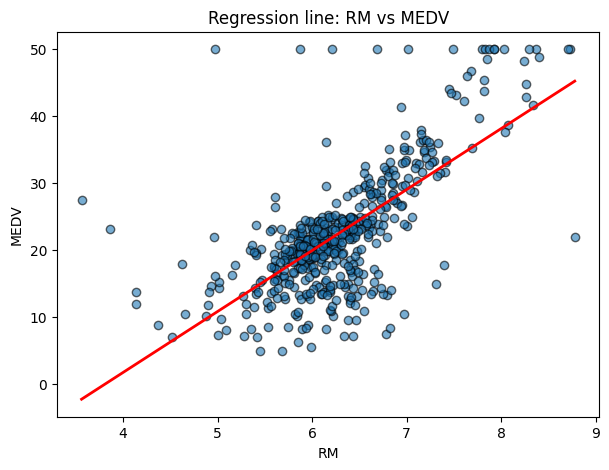

In [ ]:
strong_feature = corr.index[0]
plt.figure(figsize=(7,5))
plt.scatter(df_clean[strong_feature], df_clean['MEDV'], alpha=0.6, edgecolor='k')
# Fit simple line for this feature
m, b = np.polyfit(df_clean[strong_feature], df_clean['MEDV'], 1)
x_line = np.linspace(df_clean[strong_feature].min(), df_clean[strong_feature].max(), 100)
plt.plot(x_line, m*x_line + b, color='red', lw=2)
plt.xlabel(strong_feature)
plt.ylabel('MEDV')
plt.title(f'Regression line: {strong_feature} vs MEDV')
print(f"Strongest feature: {strong_feature}, slope: {m:.3f}, intercept: {b:.3f}")


### Predicted vs Actual plot


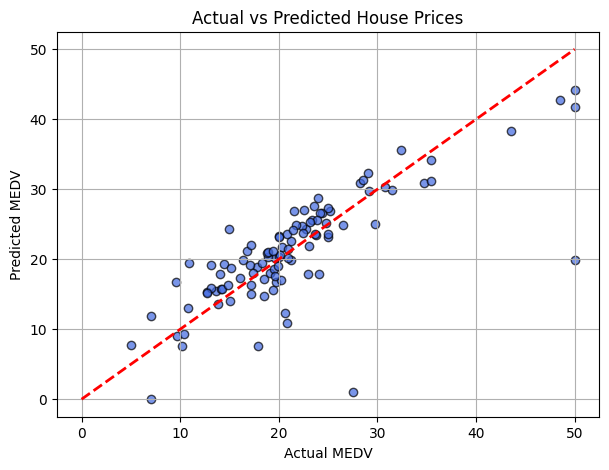

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.7, edgecolor='k')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, 'r--', lw=2)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
